In [33]:
ls results/

BCQ_MiniGrid-DoorKey-8x8-v0_0_0.0_0.0_0.3.npy
BCQ_MiniGrid-DoorKey-8x8-v0_0_0.0_0.0_0.5.npy
BCQ_MiniGrid-DoorKey-8x8-v0_0_0.0_0.0_0.7.npy
BCQ_MiniGrid-DoorKey-8x8-v0_0_0.0_0.2_0.3.npy
BCQ_MiniGrid-DoorKey-8x8-v0_0_0.0_0.2_0.5.npy
BCQ_MiniGrid-DoorKey-8x8-v0_0_0.0_0.2_0.7.npy
BCQ_MiniGrid-DoorKey-8x8-v0_0_0.0_0.4_0.3.npy
BCQ_MiniGrid-DoorKey-8x8-v0_0_0.0_0.4_0.5.npy
BCQ_MiniGrid-DoorKey-8x8-v0_0_0.0_0.4_0.7.npy
BCQ_MiniGrid-DoorKey-8x8-v0_0_0.0_0.6_0.3.npy
BCQ_MiniGrid-DoorKey-8x8-v0_0_0.0_0.6_0.5.npy
BCQ_MiniGrid-DoorKey-8x8-v0_0_0.0_0.6_0.7.npy
BCQ_MiniGrid-DoorKey-8x8-v0_0_0.0_0.8_0.3.npy
BCQ_MiniGrid-DoorKey-8x8-v0_0_0.0_0.8_0.5.npy
BCQ_MiniGrid-DoorKey-8x8-v0_0_0.0_0.8_0.7.npy
BCQ_MiniGrid-DoorKey-8x8-v0_0_0.2_0.0_0.3.npy
BCQ_MiniGrid-DoorKey-8x8-v0_0_0.2_0.0_0.5.npy
BCQ_MiniGrid-DoorKey-8x8-v0_0_0.2_0.0_0.7.npy
BCQ_MiniGrid-DoorKey-8x8-v0_0_0.2_0.2_0.3.npy
BCQ_MiniGrid-DoorKey-8x8-v0_0_0.2_0.2_0.5.npy
BCQ_MiniGrid-DoorKey-8x8-v0_0_0.2_0.2_0.7.npy
BCQ_MiniGrid-DoorKey-8x8-v0_0_0.2_

In [34]:
from pathlib import Path
import numpy as np

In [35]:
def statistics(path):
    data = np.load(path)
    mean_reward = np.mean(data)
    last_reward = data[-1]
    return mean_reward, last_reward

In [55]:
def dict2heatmap(dicts, threshold):
    d = dicts[threshold]
    matrix_len = len(d.keys())
    heatmap = np.zeros((matrix_len, matrix_len))
    k1s = sorted(d.keys())
    k2s = sorted(d[k1s[0]].keys())
    for i in range(matrix_len):
        for j in range(matrix_len):
            heatmap[i][j] = d[k1s[i]][k2s[j]]
    return heatmap

In [36]:
root_folder = Path('./results')
prefix = 'BCQ'
env = 'MiniGrid-DoorKey-8x8-v0'
seed = 0
bcq_thresholds = [0.3, 0.5, 0.7]
low_noise_ps = [0.0, 0.2, 0.4, 0.6, 0.8]
rand_action_ps = [0.0, 0.2, 0.4, 0.6, 0.8]

In [37]:
mean_rewards, last_rewards = dict(), dict()
for bcq_threshold in bcq_thresholds:
    if str(bcq_threshold) not in mean_rewards.keys():
        mean_rewards[str(bcq_threshold)] = dict()
        last_rewards[str(bcq_threshold)] = dict()
    for low_noise_p in low_noise_ps:
        if str(low_noise_p) not in mean_rewards[str(bcq_threshold)].keys():
            mean_rewards[str(bcq_threshold)][str(low_noise_p)] = dict()
            last_rewards[str(bcq_threshold)][str(low_noise_p)] = dict()
        for rand_action_p in rand_action_ps:
                mean_rewards[str(bcq_threshold)][str(low_noise_p)][str(rand_action_p)] = None
                last_rewards[str(bcq_threshold)][str(low_noise_p)][str(rand_action_p)] = None

In [38]:
for bcq_threshold in bcq_thresholds:
    for low_noise_p in low_noise_ps:
        for rand_action_p in rand_action_ps:
            fpath = root_folder / f"{prefix}_{env}_{seed}_{low_noise_p}_{rand_action_p}_{bcq_threshold}.npy"
            mean_reward, last_reward = statistics(fpath)
            mean_rewards[str(bcq_threshold)][str(low_noise_p)][str(rand_action_p)] = mean_reward
            last_rewards[str(bcq_threshold)][str(low_noise_p)][str(rand_action_p)] = last_reward

In [57]:
import seaborn as sns; sns.set_theme()

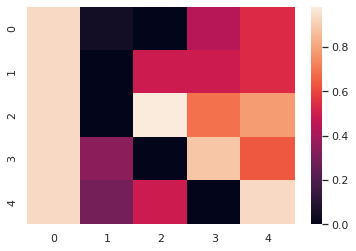

In [65]:
sns.heatmap(dict2heatmap(mean_rewards, str(0.3)))

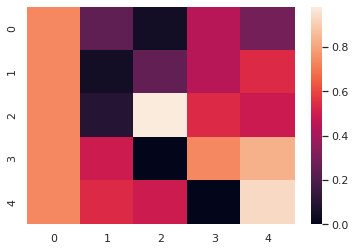

In [63]:
sns.heatmap(dict2heatmap(mean_rewards, str(0.5)))

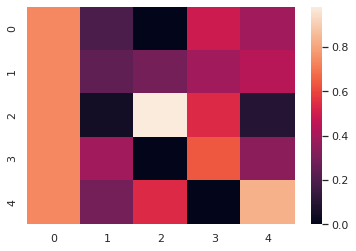

In [64]:
sns.heatmap(dict2heatmap(mean_rewards, str(0.7)))

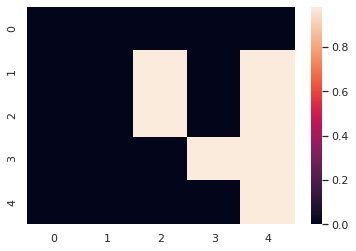

In [67]:
sns.heatmap(dict2heatmap(last_rewards, str(0.3)))

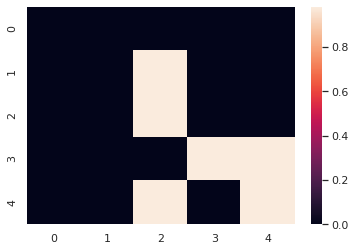

In [68]:
sns.heatmap(dict2heatmap(last_rewards, str(0.5)))

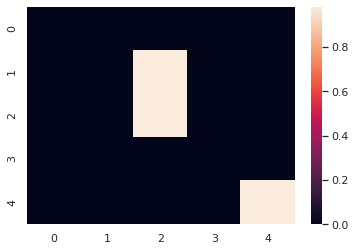

In [69]:
sns.heatmap(dict2heatmap(last_rewards, str(0.7)))